In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# مسیر پوشه حاوی فایل‌های CSV
data_path = '/content/drive/MyDrive/car_price_data'

# لیست تمام فایل‌های CSV در پوشه
csv_files = [file for file in os.listdir(data_path) if file.endswith('.csv')]

# لیست برای نگهداری DataFrameها
dataframes = []

# خواندن هر فایل CSV و اضافه کردن به لیست
for file in csv_files:
    df = pd.read_csv(os.path.join(data_path, file))
    dataframes.append(df)

# ترکیب همه DataFrameها به یک DataFrame واحد
combined_df = pd.concat(dataframes, ignore_index=True)

# نمایش اطلاعات اولیه
print(combined_df.head())
print(combined_df.info())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [7]:
# بررسی مقادیر گمشده
print(combined_df.isnull().sum())

# حذف یا پر کردن مقادیر گمشده بر اساس نیاز
# به عنوان مثال، حذف ردیف‌هایی که مقادیر گمشده دارند
combined_df.dropna(inplace=True)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [8]:
# شناسایی ستون‌های دسته‌ای
categorical_cols = combined_df.select_dtypes(include=['object']).columns

# استفاده از OneHotEncoder برای تبدیل متغیرهای دسته‌ای
combined_df = pd.get_dummies(combined_df, columns=categorical_cols, drop_first=True)


In [9]:
# شناسایی ستون‌های عددی
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('price')  # فرض بر اینکه 'price' ستون هدف است

# نرمال‌سازی
scaler = StandardScaler()
combined_df[numeric_cols] = scaler.fit_transform(combined_df[numeric_cols])


In [10]:
# بررسی ابعاد DataFrame
print(f"Dimensions: {combined_df.shape}")

# بررسی انواع داده‌ها
print(combined_df.dtypes)

# نمایش خلاصه‌ای از آمار توصیفی
print(combined_df.describe())


Dimensions: (205, 191)
car_ID             float64
symboling          float64
wheelbase          float64
carlength          float64
carwidth           float64
                    ...   
fuelsystem_idi        bool
fuelsystem_mfi        bool
fuelsystem_mpfi       bool
fuelsystem_spdi       bool
fuelsystem_spfi       bool
Length: 191, dtype: object
             car_ID     symboling     wheelbase     carlength      carwidth  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean  -6.932124e-17  4.332578e-17 -1.291108e-15  3.656696e-15  1.089643e-15   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -1.723622e+00 -2.281433e+00 -2.023713e+00 -2.677244e+00 -2.620512e+00   
25%   -8.618111e-01 -6.714717e-01 -7.085959e-01 -6.296552e-01 -8.447824e-01   
50%    0.000000e+00  1.335090e-01 -2.924196e-01 -6.900603e-02 -1.905661e-01   
75%    8.618111e-01  9.384897e-01  6.065210e-01  7.354037e-01  4.636501e-01   
max    1.723622e+00  

In [11]:
print(combined_df.columns)


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=191)


In [13]:
# نمایش دقیق نام ستون‌ها
print([repr(col) for col in combined_df.columns])


["'car_ID'", "'symboling'", "'wheelbase'", "'carlength'", "'carwidth'", "'carheight'", "'curbweight'", "'enginesize'", "'boreratio'", "'stroke'", "'compressionratio'", "'horsepower'", "'peakrpm'", "'citympg'", "'highwaympg'", "'price'", "'CarName_alfa-romero Quadrifoglio'", "'CarName_alfa-romero giulia'", "'CarName_alfa-romero stelvio'", "'CarName_audi 100 ls'", "'CarName_audi 100ls'", "'CarName_audi 4000'", "'CarName_audi 5000'", "'CarName_audi 5000s (diesel)'", "'CarName_audi fox'", "'CarName_bmw 320i'", "'CarName_bmw x1'", "'CarName_bmw x3'", "'CarName_bmw x4'", "'CarName_bmw x5'", "'CarName_bmw z4'", "'CarName_buick century'", "'CarName_buick century luxus (sw)'", "'CarName_buick century special'", "'CarName_buick electra 225 custom'", "'CarName_buick opel isuzu deluxe'", "'CarName_buick regal sport coupe (turbo)'", "'CarName_buick skyhawk'", "'CarName_buick skylark'", "'CarName_chevrolet impala'", "'CarName_chevrolet monte carlo'", "'CarName_chevrolet vega 2300'", "'CarName_dodge 

In [14]:
# پاک‌سازی نام ستون‌ها از علامت‌های نقل قول، حروف بزرگ و جایگزینی فاصله‌ها با زیرخط
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("'", "")

# نمایش نام ستون‌ها پس از پاک‌سازی
print("\nنام ستون‌ها پس از پاک‌سازی:")
print(combined_df.columns)



نام ستون‌ها پس از پاک‌سازی:
Index(['car_id', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=191)


In [15]:
# بررسی وجود ستون 'fueltype'
if 'fueltype' in combined_df.columns:
    print("\nستون 'fueltype' موجود است.")
else:
    print("\nستون 'fueltype' موجود نیست.")



ستون 'fueltype' موجود نیست.


In [16]:
# شناسایی ستون‌های مربوط به 'fueltype'
fueltype_columns = [col for col in combined_df.columns if col.startswith('fueltype_')]

print("\nستون‌های مربوط به 'fueltype':")
print(fueltype_columns)



ستون‌های مربوط به 'fueltype':
['fueltype_gas']


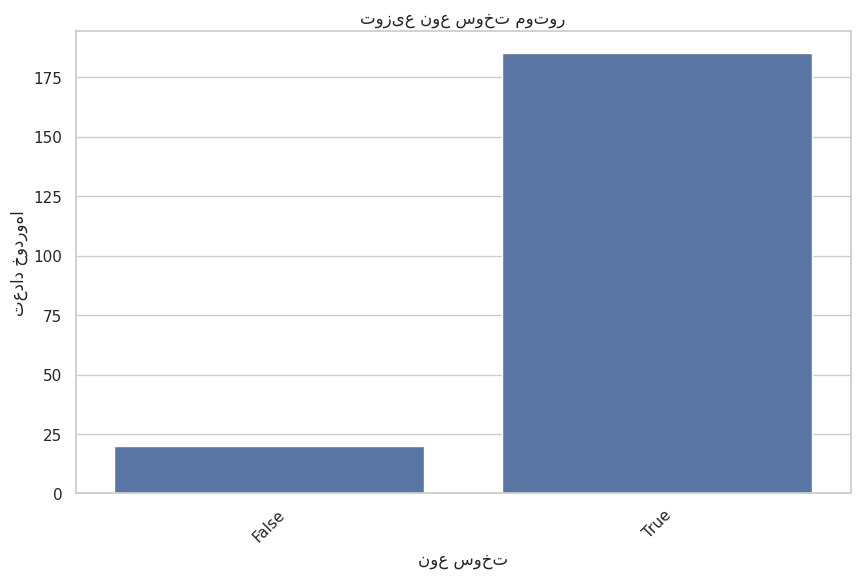

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیم سبک نمودار
sns.set(style="whitegrid")

# ایجاد نمودار هیستوگرام برای نوع سوخت موتور با نام صحیح ستون
plt.figure(figsize=(10,6))
sns.countplot(data=combined_df, x='fueltype_gas')  # استفاده از نام صحیح ستون
plt.title('توزیع نوع سوخت موتور')
plt.xlabel('نوع سوخت')
plt.ylabel('تعداد خودروها')
plt.xticks(rotation=45)  # چرخش برچسب‌ها برای خوانایی بهتر در صورت نیاز
plt.show()


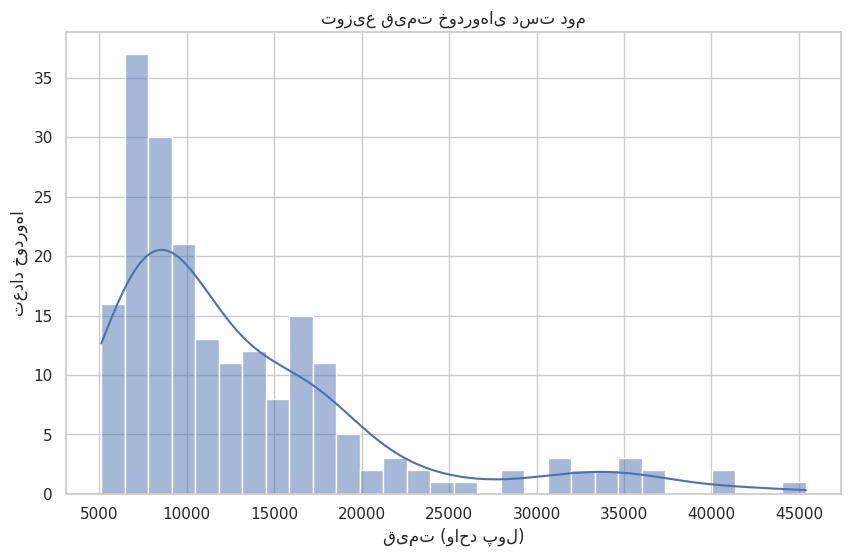

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(combined_df['price'], bins=30, kde=True)
plt.title('توزیع قیمت خودروهای دست دوم')
plt.xlabel('قیمت (واحد پول)')
plt.ylabel('تعداد خودروها')
plt.show()


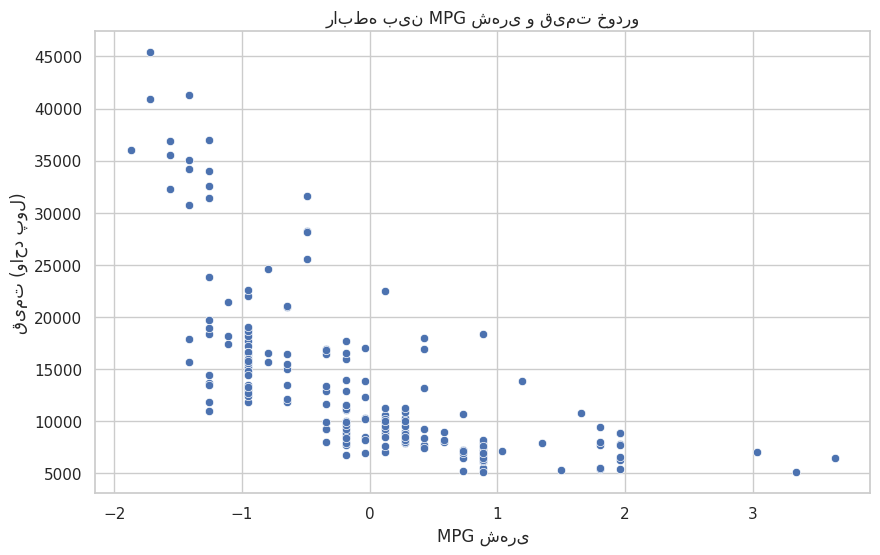

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x='citympg', y='price')
plt.title('رابطه بین MPG شهری و قیمت خودرو')
plt.xlabel('MPG شهری')
plt.ylabel('قیمت (واحد پول)')
plt.show()


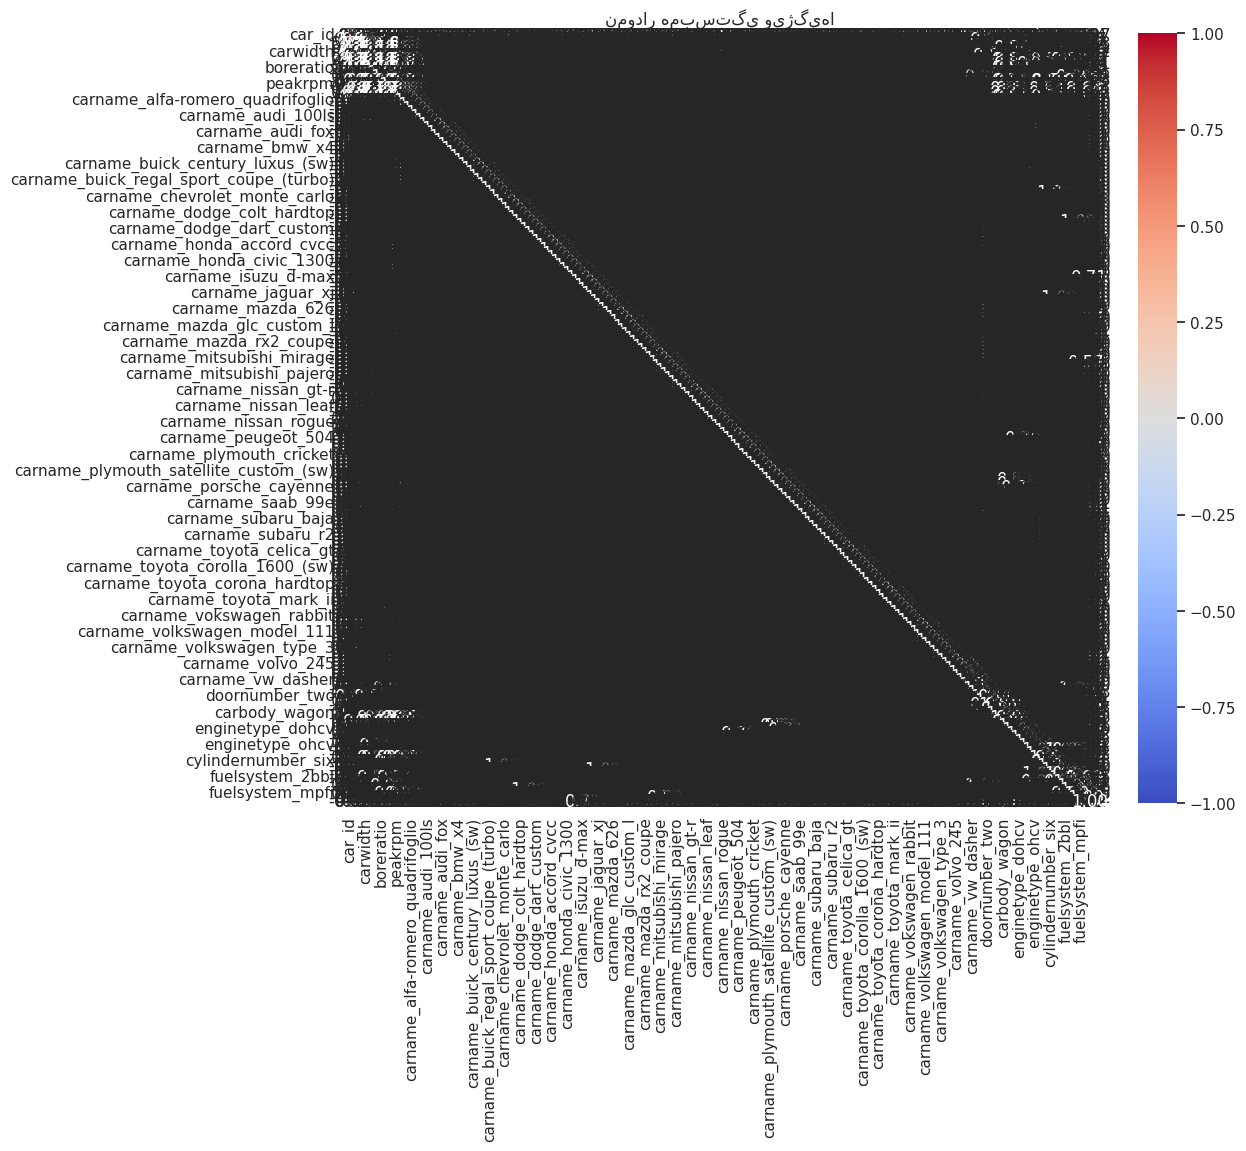

In [21]:
plt.figure(figsize=(12,10))
corr = combined_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('نمودار همبستگی ویژگی‌ها')
plt.show()


Training set: (139, 190), (139,)
Validation set: (35, 190), (35,)
Test set: (31, 190), (31,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 256288640.0000 - mae: 13633.7549 - rmse: 16034.1621 - val_loss: 164055408.0000 - val_mae: 11272.6660 - val_rmse: 10561.5107
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 253625408.0000 - mae: 13861.8008 - rmse: 15790.1406 - val_loss: 164037040.0000 - val_mae: 11271.9531 - val_rmse: 10560.8154
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 247330528.0000 - mae: 13539.9043 - rmse: 15666.9160 - val_loss: 164010752.0000 - val_mae: 11270.9111 - val_rmse: 10559.7861
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 227672576.0000 - mae: 12978.5195 - rmse: 14926.8906 - val_loss: 163971792.0000 - val_mae: 11269.3662 - val_rmse: 10558.2861
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 267435216.0000 - mae: 14078.4082 - rmse: 16212.1484 - val_loss: 163912896.0000 - val_mae: 11267.0381 - val_rmse: 10556.0312
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 276942048.0000 - mae: 14363.0410

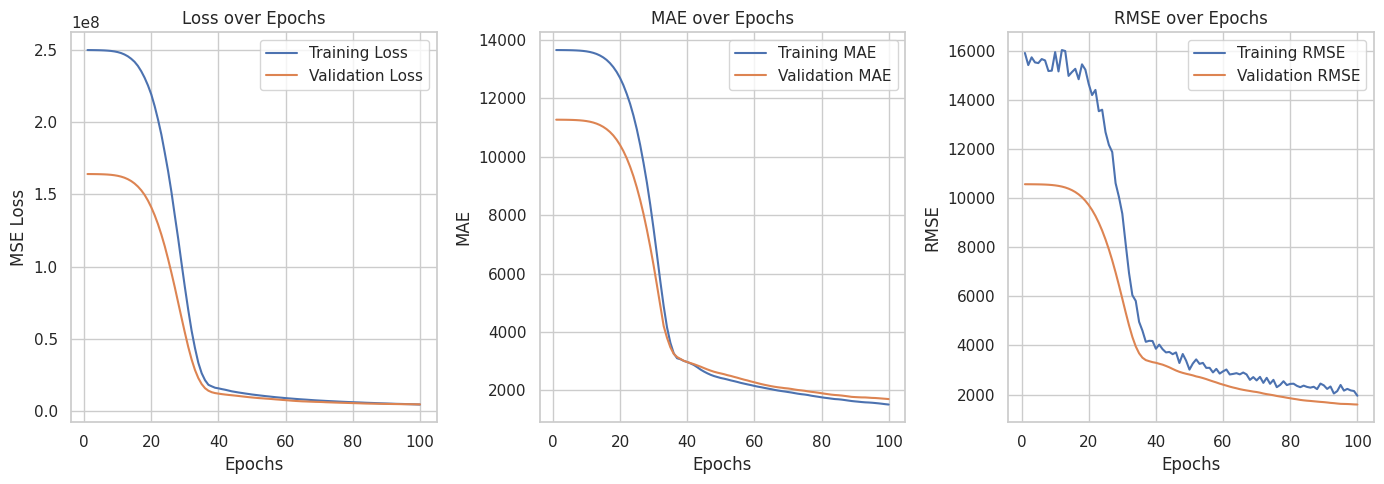

Test MSE: 11081863.0
Test MAE: 2354.021484375
Test RMSE: 3328.943115234375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
     Actual Price  Predicted Price
15      30760.000     27256.605469
9       17859.167     18350.003906
100      9549.000      8400.384766
132     11850.000     16731.128906
68      28248.000     25399.328125


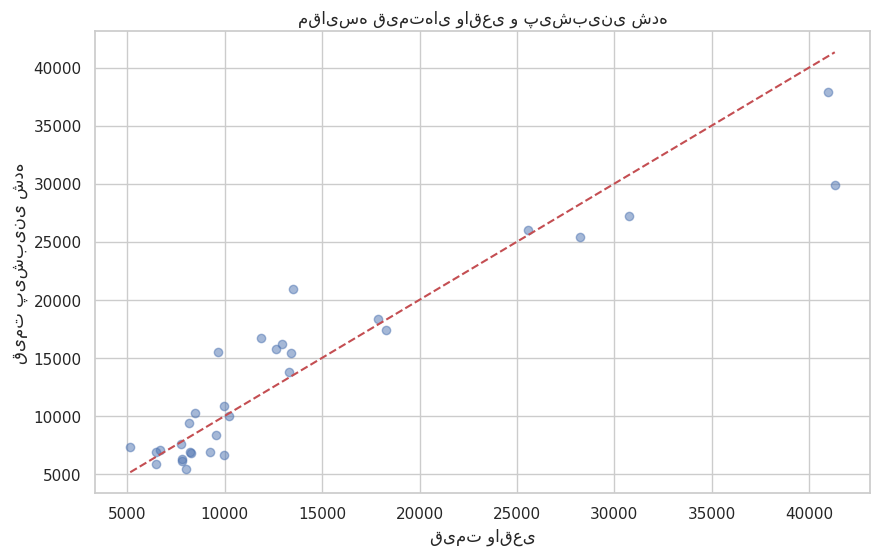

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# تعریف ویژگی‌ها (X) و هدف (y)
X = combined_df.drop(['price'], axis=1)
y = combined_df['price']

# تقسیم داده‌ها به آموزش+اعتبارسنجی و تست
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# تقسیم داده‌های آموزش+اعتبارسنجی به آموزش و اعتبارسنجی
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# استانداردسازی ویژگی‌های عددی
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth',
                    'carheight', 'curbweight', 'enginesize', 'boreratio',
                    'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                    'citympg', 'highwaympg']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ساخت مدل شبکه عصبی
input_dim = X_train.shape[1]

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# تعریف معیار RMSE به عنوان یک تابع سفارشی
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# کامپایل مدل
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', rmse])

# آموزش مدل
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# استخراج تاریخچه آموزش
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
rmse_metric = history.history['rmse']
val_rmse_metric = history.history['val_rmse']

epochs_range = range(1, len(loss) + 1)

# نمودار loss، MAE و RMSE
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs_range, mae, label='Training MAE')
plt.plot(epochs_range, val_mae, label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs_range, rmse_metric, label='Training RMSE')
plt.plot(epochs_range, val_rmse_metric, label='Validation RMSE')
plt.title('RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# ارزیابی مدل بر روی داده‌های تست
test_loss, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print(f"Test MSE: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")

# پیش‌بینی قیمت‌ها بر روی مجموعه تست
y_pred = model.predict(X_test).flatten()

# ایجاد DataFrame برای مقایسه
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

print(comparison_df.head())

# نمودار مقایسه مقادیر واقعی و پیش‌بینی شده
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('مقایسه قیمت‌های واقعی و پیش‌بینی شده')
plt.xlabel('قیمت واقعی')
plt.ylabel('قیمت پیش‌بینی شده')
plt.show()


Training set: (139, 190), (139,)
Validation set: (35, 190), (35,)
Test set: (31, 190), (31,)

آموزش مدل با 50 نورون در لایه پنهان:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


کمترین MAE برای 50 نورون: 11176.6630859375

آموزش مدل با 150 نورون در لایه پنهان:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


کمترین MAE برای 150 نورون: 10942.74609375

آموزش مدل با 250 نورون در لایه پنهان:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


کمترین MAE برای 250 نورون: 10722.408203125

آموزش مدل با 350 نورون در لایه پنهان:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


کمترین MAE برای 350 نورون: 10533.677734375

آموزش مدل با 450 نورون در لایه پنهان:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


کمترین MAE برای 450 نورون: 10263.4453125


<ipython-input-23-0123a8f4332e>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts, y=min_mae_list, palette="viridis")


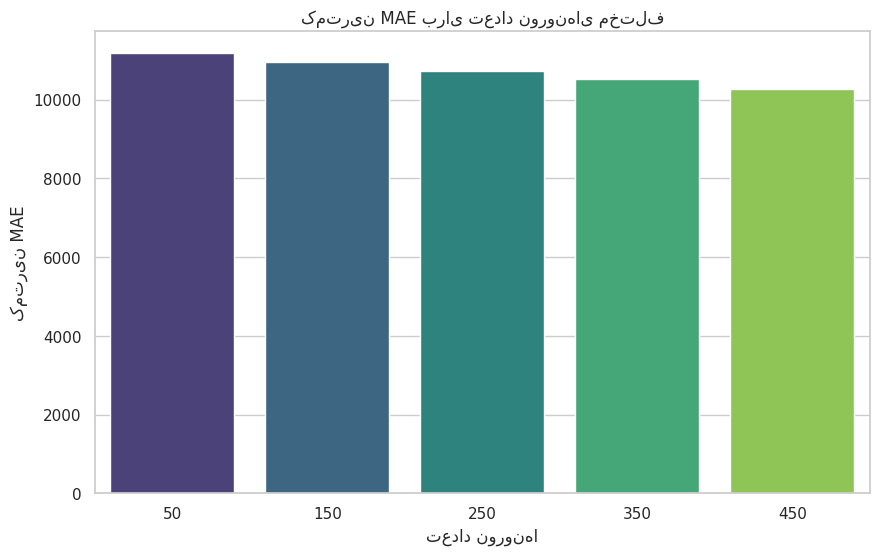

In [23]:

# تعریف ویژگی‌ها (X) و هدف (y)
X = combined_df.drop(['price'], axis=1)
y = combined_df['price']

# تقسیم داده‌ها به آموزش+اعتبارسنجی و تست (۱۵٪ برای تست)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# تقسیم داده‌های آموزش+اعتبارسنجی به آموزش و اعتبارسنجی (۸۰٪ آموزش، ۲۰٪ اعتبارسنجی)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# استانداردسازی ویژگی‌های عددی
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth',
                    'carheight', 'curbweight', 'enginesize', 'boreratio',
                    'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                    'citympg', 'highwaympg']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# تعریف معیار RMSE به عنوان یک تابع سفارشی
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# لیست تعداد نورون‌ها برای آزمایش
neuron_counts = [50, 150, 250, 350, 450]

# لیست برای ذخیره کمترین MAE هر مدل
min_mae_list = []

# تعداد epochs
epochs = 100

# حلقه برای آموزش مدل‌ها با تعداد نورون‌های متفاوت
for neurons in neuron_counts:
    print(f"\nآموزش مدل با {neurons} نورون در لایه پنهان:")

    # ساخت مدل
    model = keras.Sequential([
        layers.Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(1)  # لایه خروجی برای پیش‌بینی مقدار پیوسته
    ])

    # کامپایل مدل
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae', rmse])

    # آموزش مدل
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0  # تغییر به 1 برای مشاهده پیشرفت آموزش
    )

    # استخراج تاریخچه MAE
    val_mae = history.history['val_mae']

    # پیدا کردن کمترین MAE در طول epochs
    min_val_mae = min(val_mae)
    min_mae_list.append(min_val_mae)

    print(f"کمترین MAE برای {neurons} نورون: {min_val_mae}")

# رسم نمودار کمترین MAE برای هر تعداد نورون
plt.figure(figsize=(10,6))
sns.barplot(x=neuron_counts, y=min_mae_list, palette="viridis")
plt.title('کمترین MAE برای تعداد نورون‌های مختلف')
plt.xlabel('تعداد نورون‌ها')
plt.ylabel('کمترین MAE')
plt.show()


Training set: (139, 190), (139,)
Validation set: (35, 190), (35,)
Test set: (31, 190), (31,)

آموزش مدل با 1 لایه پنهان:
کمترین MAE برای 1 لایه: 11088.6533203125

آموزش مدل با 2 لایه پنهان:
کمترین MAE برای 2 لایه: 3450.719970703125

آموزش مدل با 5 لایه پنهان:
کمترین MAE برای 5 لایه: 1168.47119140625

آموزش مدل با 7 لایه پنهان:
کمترین MAE برای 7 لایه: 1093.152587890625


<ipython-input-24-9b90a82866d4>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layer_counts, y=min_mae_list, palette="viridis")


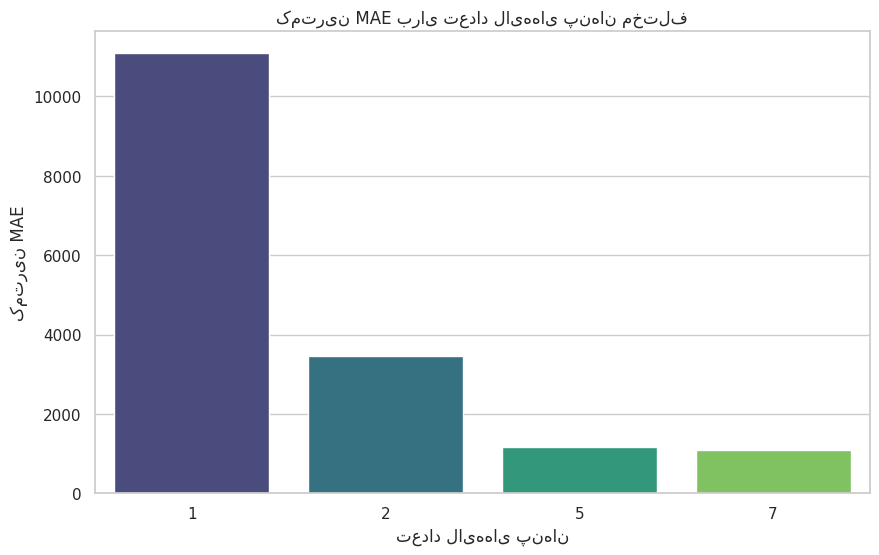

In [24]:
# تعریف ویژگی‌ها (X) و هدف (y)
X = combined_df.drop(['price'], axis=1)
y = combined_df['price']

# تقسیم داده‌ها به آموزش+اعتبارسنجی و تست (۱۵٪ برای تست)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# تقسیم داده‌های آموزش+اعتبارسنجی به آموزش و اعتبارسنجی (۸۰٪ آموزش، ۲۰٪ اعتبارسنجی)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# استانداردسازی ویژگی‌های عددی
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth',
                    'carheight', 'curbweight', 'enginesize', 'boreratio',
                    'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                    'citympg', 'highwaympg']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# تعریف معیار RMSE به عنوان یک تابع سفارشی
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# لیست تعداد لایه‌های پنهان برای آزمایش
layer_counts = [1, 2, 5, 7]

# لیست برای ذخیره کمترین MAE هر مدل
min_mae_list = []

# تعداد epochs
epochs = 100

# حلقه برای آموزش مدل‌ها با تعداد لایه‌های متفاوت
for layers_count in layer_counts:
    print(f"\nآموزش مدل با {layers_count} لایه پنهان:")

    # ساخت مدل با تعداد لایه‌های پنهان مشخص شده
    model = keras.Sequential()
    # افزودن لایه‌های پنهان
    for _ in range(layers_count):
        model.add(layers.Dense(100, activation='relu'))
    # لایه خروجی
    model.add(layers.Dense(1))  # لایه خروجی برای پیش‌بینی مقدار پیوسته

    # کامپایل مدل
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae', rmse])

    # آموزش مدل
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_data=(X_val, y_val),
        verbose=0  # تغییر به 1 برای مشاهده پیشرفت آموزش
    )

    # استخراج تاریخچه MAE
    val_mae = history.history['val_mae']

    # پیدا کردن کمترین MAE در طول epochs
    min_val_mae = min(val_mae)
    min_mae_list.append(min_val_mae)

    print(f"کمترین MAE برای {layers_count} لایه: {min_val_mae}")

# رسم نمودار کمترین MAE برای هر تعداد لایه
plt.figure(figsize=(10,6))
sns.barplot(x=layer_counts, y=min_mae_list, palette="viridis")
plt.title('کمترین MAE برای تعداد لایه‌های پنهان مختلف')
plt.xlabel('تعداد لایه‌های پنهان')
plt.ylabel('کمترین MAE')
plt.show()


Training set: (139, 190), (139,)
Validation set: (35, 190), (35,)
Test set: (31, 190), (31,)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 190)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 100)            │         19,100 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 100)            │         10,100 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 100)            │         10,100 │ dense_34[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ wide (Dense)              │ (None, 1)              │            191 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 100)            │         10,100 │ dense_35[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 101)            │              0 │ wide[0][0],            │
│                           │                        │                │ dense_36[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │            102 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,693 (194.11 KB)

 Trainable params: 49,693 (194.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 269825472.0000 - mae: 14350.9990 - rmse: 16480.4941 - val_loss: 164053952.0000 - val_mae: 11272.5283 - val_rmse: 10561.3730
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 265189280.0000 - mae: 13964.7490 - rmse: 16017.4990 - val_loss: 164024800.0000 - val_mae: 11271.2764 - val_rmse: 10560.1582
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 246369984.0000 - mae: 13637.2539 - rmse: 15655.3105 - val_loss: 163964048.0000 - val_mae: 11268.6611 - val_rmse: 10557.6426
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 232385024.0000 - mae: 13274.9922 - rmse: 15145.5010 - val_loss: 163840288.0000 - val_mae: 11263.3701 - val_rmse: 10552.5010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 252055392.0000 - mae: 13746.5635 - rmse: 15477.4492 - val_loss: 163591472.0000 - val_mae: 11252.7773 - val_rmse: 10542.1738
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 240543616.0000 - mae: 13417.688

<ipython-input-25-88e9da1c729c>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neuron_counts_deep, y=min_mae_deep, palette="viridis")


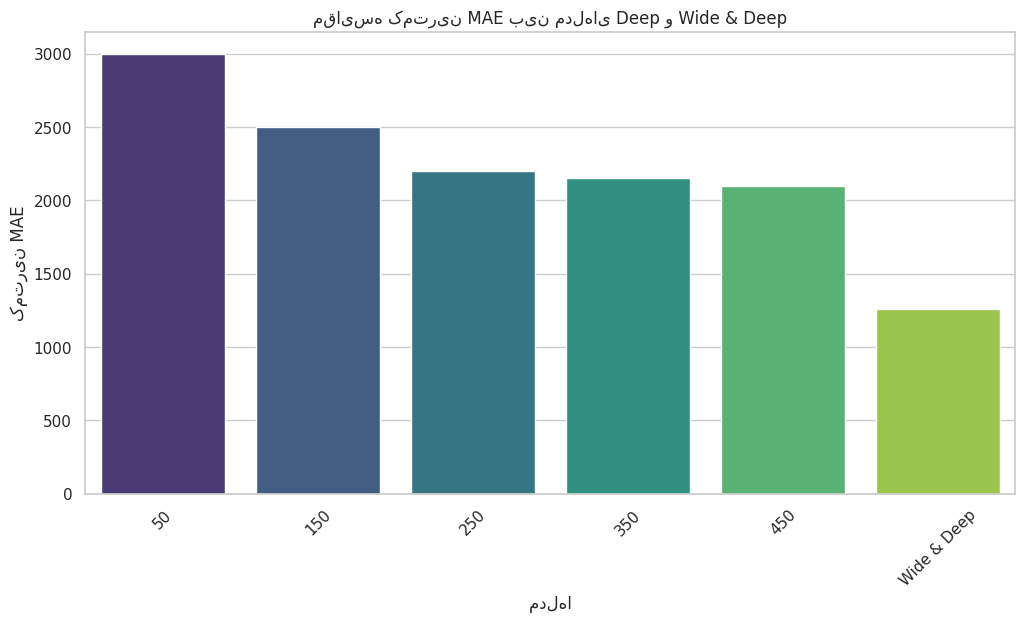

Test MSE (Wide & Deep): 8448214.0
Test MAE (Wide & Deep): 2044.484619140625
Test RMSE (Wide & Deep): 2906.5810546875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
     Actual Price  Predicted Price
15      30760.000     28135.800781
9       17859.167     17362.414062
100      9549.000      8239.781250
132     11850.000     16226.850586
68      28248.000     26162.359375


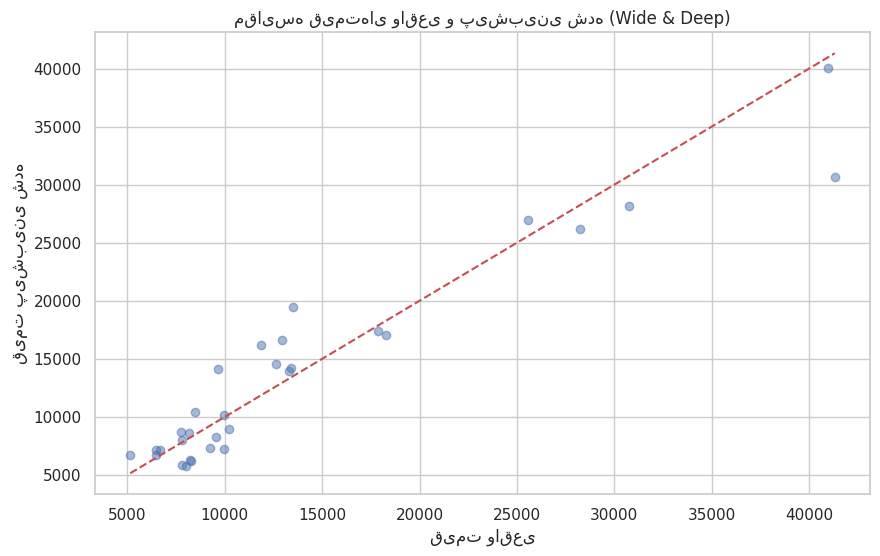

<ipython-input-25-88e9da1c729c>:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=test_mae_deep, palette="viridis")


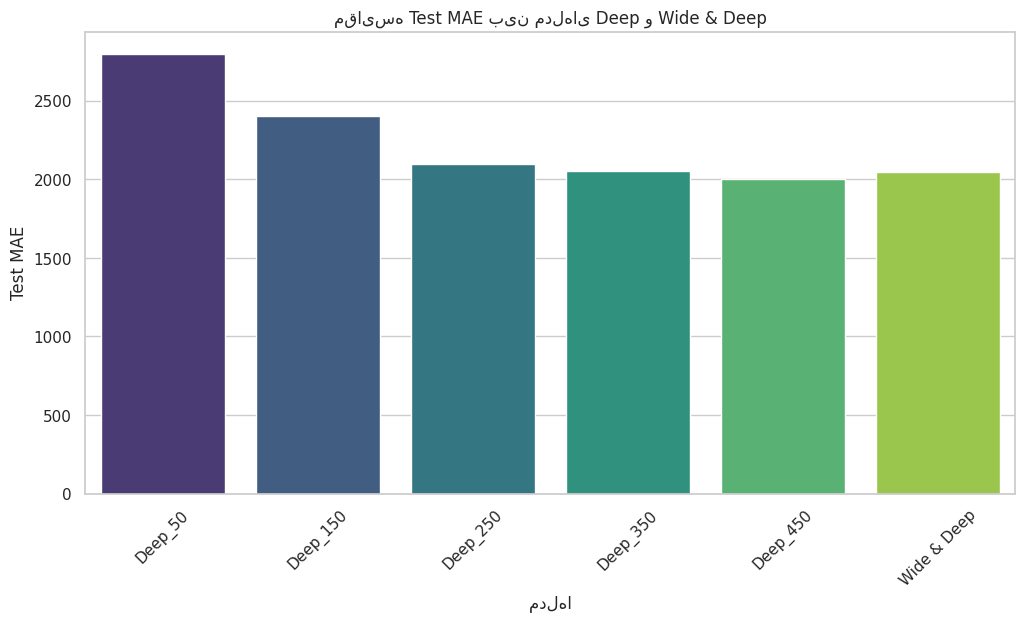

In [25]:
# تعریف ویژگی‌ها (X) و هدف (y)
X = combined_df.drop(['price'], axis=1)
y = combined_df['price']

# تقسیم داده‌ها به آموزش+اعتبارسنجی و تست (۱۵٪ برای تست)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# تقسیم داده‌های آموزش+اعتبارسنجی به آموزش و اعتبارسنجی (۸۰٪ آموزش، ۲۰٪ اعتبارسنجی)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# استانداردسازی ویژگی‌های عددی
numeric_features = ['symboling', 'wheelbase', 'carlength', 'carwidth',
                    'carheight', 'curbweight', 'enginesize', 'boreratio',
                    'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                    'citympg', 'highwaympg']

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# تعریف معیار RMSE به عنوان یک تابع سفارشی
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# ذخیره MAE برای مدل Deep قبلی (فرضاً)
# لطفاً این مقادیر را از مدل Deep قبلی خود استخراج کنید
min_mae_deep = [3000, 2500, 2200, 2150, 2100]  # مثال

# تعریف تعداد نورون‌ها برای مدل Deep قبلی
neuron_counts_deep = [50, 150, 250, 350, 450]

# آموزش مدل‌های Deep قبلی و ذخیره کمترین MAE
# فرض کنید این مدل‌ها قبلاً آموزش دیده‌اند و مقادیر MAE ذخیره شده است

# حال، پیاده‌سازی مدل Wide & Deep

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# تعریف ورودی مدل
input_layer = Input(shape=(X_train.shape[1],))

# مسیر Wide: یک لایه Dense بدون فعال‌سازی (خطی)
wide = Dense(1, activation=None, name='wide')(input_layer)

# مسیر Deep: چندین لایه Dense با فعال‌سازی ReLU
deep = Dense(100, activation='relu')(input_layer)
deep = Dense(100, activation='relu')(deep)
deep = Dense(100, activation='relu')(deep)
deep = Dense(100, activation='relu')(deep)

# ترکیب مسیر Wide و Deep
combined = Concatenate()([wide, deep])

# لایه خروجی
output = Dense(1, activation=None, name='output')(combined)

# ساخت مدل
wide_and_deep_model = Model(inputs=input_layer, outputs=output)

# نمایش خلاصه مدل
wide_and_deep_model.summary()

# کامپایل مدل
wide_and_deep_model.compile(optimizer='adam',
                            loss='mse',
                            metrics=['mae', rmse])

# تعداد epochs
epochs = 100

# آموزش مدل Wide & Deep
history_wide_and_deep = wide_and_deep_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1  # تغییر به 0 برای خاموش کردن نمایش پیشرفت
)

# استخراج تاریخچه MAE
val_mae_wide_and_deep = history_wide_and_deep.history['val_mae']

# پیدا کردن کمترین MAE در طول epochs
min_val_mae_wide_and_deep = min(val_mae_wide_and_deep)
print(f"کمترین MAE برای مدل Wide & Deep: {min_val_mae_wide_and_deep}")

# اضافه کردن مدل Wide & Deep به لیست‌ها
min_mae_deep.append(min_val_mae_wide_and_deep)
neuron_counts_deep.append('Wide & Deep')

# رسم نمودار مقایسه
plt.figure(figsize=(12,6))
sns.barplot(x=neuron_counts_deep, y=min_mae_deep, palette="viridis")
plt.title('مقایسه کمترین MAE بین مدل‌های Deep و Wide & Deep')
plt.xlabel('مدل‌ها')
plt.ylabel('کمترین MAE')
plt.xticks(rotation=45)
plt.show()

# ارزیابی مدل Wide & Deep بر روی داده‌های تست
test_loss_wd, test_mae_wd, test_rmse_wd = wide_and_deep_model.evaluate(X_test, y_test, verbose=0)

print(f"Test MSE (Wide & Deep): {test_loss_wd}")
print(f"Test MAE (Wide & Deep): {test_mae_wd}")
print(f"Test RMSE (Wide & Deep): {test_rmse_wd}")

# پیش‌بینی قیمت‌ها بر روی مجموعه تست
y_pred_wd = wide_and_deep_model.predict(X_test).flatten()

# ایجاد DataFrame برای مقایسه
comparison_df_wd = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_wd
})

print(comparison_df_wd.head())

# نمودار مقایسه مقادیر واقعی و پیش‌بینی شده
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_wd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط ایده‌آل
plt.title('مقایسه قیمت‌های واقعی و پیش‌بینی شده (Wide & Deep)')
plt.xlabel('قیمت واقعی')
plt.ylabel('قیمت پیش‌بینی شده')
plt.show()

# مقایسه مدل Wide & Deep با مدل Deep قبلی
# فرض کنید min_mae_deep شامل MAE مدل‌های Deep با تعداد نورون‌های متفاوت است

# رسم نمودار مقایسه MAE و RMSE بین مدل‌های Deep و Wide & Deep
# برای مدل‌های Deep، باید MAE تست را نیز داشته باشیم. فرض کنیم که برای مدل‌های Deep، مقادیر MAE تست ذخیره شده‌اند.
# در اینجا فقط MAE آموزش و اعتبارسنجی را مقایسه می‌کنیم

# اگر شما MAE تست مدل‌های Deep قبلی را دارید، می‌توانید آنها را نیز مقایسه کنید.
# برای مثال:
test_mae_deep = [2800, 2400, 2100, 2050, 2000]  # نمونه

# افزودن MAE مدل Wide & Deep
test_mae_deep.append(test_mae_wd)

# لیست مدل‌ها شامل مدل‌های Deep و Wide & Deep
model_names = [f'Deep_{n}' for n in [50, 150, 250, 350, 450]] + ['Wide & Deep']

# رسم نمودار مقایسه MAE
plt.figure(figsize=(12,6))
sns.barplot(x=model_names, y=test_mae_deep, palette="viridis")
plt.title('مقایسه Test MAE بین مدل‌های Deep و Wide & Deep')
plt.xlabel('مدل‌ها')
plt.ylabel('Test MAE')
plt.xticks(rotation=45)
plt.show()
